**Zadanie 1**

In [66]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

data  = np.loadtxt('treatment.txt', delimiter=',')
data[:,0]/=np.max(data[:,0])
data[:,1]/=np.max(data[:,1])
labels = data[:,-1]
data = data[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify = labels, test_size=0.2)
network = MLPClassifier(hidden_layer_sizes = (5,5), max_iter=1000)
network.fit(X_train,y_train)
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)
print(network.score(X_train,y_train))

[[132   8]
 [ 16  83]]
0.8806282722513089


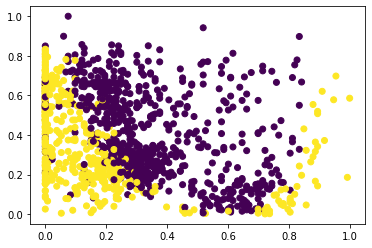

In [67]:
plt.scatter(data[:,0], data[:,1], c=labels)

In [73]:
for i in (5,5), (20,20), (40,40), (5,5,5), (20,20,20), (40,40,40):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify = labels, test_size=0.2)
    network = MLPClassifier(hidden_layer_sizes=i, max_iter = 5000)
    network.fit(X_train,y_train)
    predicted_labels = network.predict(X_test)
    matrix = confusion_matrix(y_test, predicted_labels)
    print(i,': \n', matrix)
    print(network.score(X_test,y_test))
    plt.scatter(X_test[:,0], X_test[:,1], c=predicted_labels)
    plt.savefig(str(i)+'.png')
    plt.close()


(5, 5) : 
 [[130  10]
 [ 17  82]]
0.8870292887029289
(20, 20) : 
 [[136   4]
 [ 11  88]]
0.9372384937238494
(40, 40) : 
 [[129  11]
 [ 10  89]]
0.9121338912133892
(5, 5, 5) : 
 [[125  15]
 [ 13  86]]
0.8828451882845189
(20, 20, 20) : 
 [[127  13]
 [  4  95]]
0.9288702928870293
(40, 40, 40) : 
 [[132   8]
 [  8  91]]
0.9330543933054394


**Zadanie 2**

In [82]:
from sklearn import datasets
loaded_data = datasets.load_digits()
data = loaded_data.data
target = loaded_data.target
# print(data)
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify = target, test_size=0.2)

model = MLPClassifier(hidden_layer_sizes = (5,5),tol=10e-4, max_iter=1000)

model.fit(data, target)
print('score:', model.score(X_test,y_test))
# predicted_labels_test = model.predict(X_test)
# matrix_test = confusion_matrix(y_test,predicted_labels_test)
# matrix_test

score: 0.7805555555555556


**Zadanie 3**

In [81]:

X_train, X_test, y_train, y_test = train_test_split(data, target, stratify = target, test_size=0.2)
model = MLPClassifier(max_iter = 1000, tol = 0.001)
model.fit(data, target)
print('score:', model.score(X_test,y_test))
predicted_labels_test = model.predict(X_test)
matrix_test = confusion_matrix(y_test,predicted_labels_test)
matrix_test

score: 1.0


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]])

In [83]:
for activation in ['identity', 'logistic', 'tanh', 'relu']:
  for size in [(20), (20,20), (20,20,20)]:
    for solver in ['lbfgs', 'sgd', 'adam']:
      for max_iter in [1000, 3000]:
        # X_train, X_test, y_train, y_test = train_test_split(data, target, stratify = target, test_size=0.2)
        model = MLPClassifier(solver=solver,hidden_layer_sizes=size, max_iter = max_iter, tol = 0.001, activation = activation)
        model.fit(data, target)
        print('score for',activation,', size ', size, 'and solver',solver,'number of iterations', max_iter,': ', model.score(X_test,y_test))
        predicted_labels_test = model.predict(X_test)
        matrix_test = confusion_matrix(y_test,predicted_labels_test)
        print(matrix_test)

score for identity , size  20 and solver lbfgs number of iterations 1000 :  1.0
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 36]]
score for identity , size  20 and solver lbfgs number of iterations 3000 :  1.0
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 36]]
score for identity , size  20 and solver sgd number of iterations 1000 :  0.9805555555555555
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 0  1 34  0  0  0

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


score for logistic , size  (20, 20, 20) and solver lbfgs number of iterations 1000 :  0.9583333333333334
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  5  0]
 [ 0  0 34  1  0  0  0  0  0  0]
 [ 0  0  3 34  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  1 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  2  0  1 32  0]
 [ 0  0  0  0  0  0  0  0  1 35]]
score for logistic , size  (20, 20, 20) and solver lbfgs number of iterations 3000 :  0.9916666666666667
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 36]]
score for logistic , size  (20, 20, 20) and solver sgd number of iterations 1000 :  0.1
[[ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0

In [60]:
for learning_rate in ['constant', 'invscaling', 'adaptive']:
  X_train, X_test, y_train, y_test = train_test_split(data, target, stratify = target, test_size=0.2)
  model = MLPClassifier(solver='sgd', max_iter = 1000, tol = 0.001, learning_rate=learning_rate)
  model.fit(data, target)
  print(learning_rate,', score:', model.score(X_test,y_test))
  predicted_labels_test = model.predict(X_test)
  matrix_test = confusion_matrix(y_test,predicted_labels_test)
  matrix_test

constant , score: 0.9944444444444445
invscaling , score: 0.7694444444444445
adaptive , score: 0.9972222222222222


**Zadanie 4**

In [87]:
from sklearn.metrics import balanced_accuracy_score

yeast_set = np.loadtxt('yeast.data', usecols=(1,2,3,4,5,6,7,8))
yeast_set_labels_text = np.loadtxt('yeast.data', usecols=(9),dtype=(str))
label_encoder = preprocessing.LabelEncoder()
yeast_set_labels = label_encoder.fit(yeast_set_labels_text).transform(yeast_set_labels_text)

X_train, X_test, y_train, y_test = train_test_split(yeast_set, yeast_set_labels, stratify = yeast_set_labels, test_size=0.2)

model = MLPClassifier(hidden_layer_sizes = (100,100,100), solver='adam', max_iter = 5000, activation='relu')
model.fit(X_train, y_train)

predicted_labels_test = model.predict(X_test)
matrix_test = confusion_matrix(y_test,predicted_labels_test)
print(matrix_test)
print(balanced_accuracy_score(y_test, predicted_labels_test))
print(model.score(X_test,y_test))
print('-----')
predicted_labels_train = model.predict(X_train)
matrix_test = confusion_matrix(y_train,predicted_labels_train)
print(matrix_test)
print(balanced_accuracy_score(y_train, predicted_labels_train))
print(model.score(X_train,y_train))

[[60  0  0  1  0  2  9 21  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 1  0  4  0  2  0  0  0  0  0]
 [ 0  0  1  8  0  0  0  0  0  0]
 [ 1  0  1  2  4  0  0  2  0  0]
 [ 4  0  0  0  0 24  2  2  0  0]
 [ 8  0  0  1  0  3 31  6  0  0]
 [29  0  1  0  0  6  4 46  0  0]
 [ 0  0  0  0  0  0  2  0  2  0]
 [ 3  0  1  0  0  2  0  0  0  0]]
0.49230155327947633
0.6026936026936027
-----
[[252   0   1   0   1   3  22  91   0   0]
 [  0   4   0   0   0   0   0   0   0   0]
 [  3   0  18   4   0   0   2   1   0   0]
 [  0   0   1  31   3   0   0   0   0   0]
 [  3   0   4   4  17   7   2   4   0   0]
 [  2   0   0   0   0 119   2   8   0   0]
 [ 33   0   1   2   4   3 135  17   0   0]
 [ 87   0   0   0   1   8  20 227   0   0]
 [  5   0   0   1   2   0   0   0   8   0]
 [ 10   0   2   0   1   5   2   4   0   0]]
0.6386798875041478
0.6832350463352991
